In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re

In [11]:
#Function to load data

# Fonction pour extraire le nom de l'expérience à partir du nom de fichier
def extract_experiment_name(file_name, pattern):
    # Expression régulière pour rechercher le motif "P-V 1V_1#1" dans le nom de fichier
    match = re.search(pattern, file_name)
    if match:
        return match.group()
    else:
        return None

def load_data(data_folder, chip_name, placement, size, graph_type):
    # Liste des dossiers dans le dossier data_folder
    date_folders = os.listdir(data_folder)
    
    # Parcours des dossiers de date
    for date_folder in date_folders:
        # Chemin complet du dossier de date
        date_folder_path = os.path.join(data_folder, date_folder)
        
        # Liste des dossiers de chips dans le dossier de date
        chip_folders = os.listdir(date_folder_path)
        
        # Parcours des dossiers de chips
        for chip_folder in chip_folders:
            # Vérification si le nom de la chip correspond
            if chip_name in chip_folder:
                # Chemin complet du dossier de la chip
                chip_folder_path = os.path.join(date_folder_path, chip_folder)
                
                # Liste des fichiers xls dans le dossier de la chip
                xls_files = [file for file in os.listdir(chip_folder_path) if file.endswith('.xls')]
                
                # Parcours des fichiers xls
                for xls_file in xls_files:
                    # Séparation du nom du fichier
                    file_parts = xls_file.split('_')
                    file_placement, file_size, end = file_parts[0], file_parts[1], '_'.join(file_parts[4:])
                    file_graph_type = extract_experiment_name(xls_file, graph_type)
                    #file_graph_type = file_graph_type.split('.')[0]

                    print(file_graph_type)
                    
                    # Vérification si les critères de recherche correspondent
                    if file_placement == placement and file_size == size and file_graph_type == graph_type:
                        # Chargement des données xls dans une DataFrame
                        xls_path = os.path.join(chip_folder_path, xls_file)
                        data = pd.read_excel(xls_path)
                        return data

In [12]:
# Fonction pour tracer les courbes pour chaque chip avec des couleurs différentes
def plot_data(data_list):
    plt.figure(figsize=(10, 5))
    colors = ['blue', 'red', 'green', 'orange', 'purple']  # Liste de couleurs pour les courbes
    for i, data in enumerate(data_list, start=1):
        if i > len(colors):  # Limite à 5 couleurs
            break
        chip_name = data['Chip'].iloc[0]  # Récupérer le nom de la chip à partir des données
        plt.plot(data['Vforce'], data['Charge']/Size_num, marker='o', label=chip_name, color=colors[i-1], linewidth=0.8)
    plt.title(f'Polarisation vs Voltage ({placement}, taille {size}, expérience {graph_type})')
    plt.xlabel('Voltage')
    plt.ylabel('Polarisation')
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

def plot_pump(data_list):
    plt.figure(figsize=(10, 5))
    colors = ['blue', 'red', 'green', 'orange', 'purple']  # Liste de couleurs pour les courbes
    for i, data in enumerate(data_list, start=1):
        if i > len(colors):  # Limite à 5 couleurs
            break
        chip_name = data['Chip'].iloc[0]  # Récupérer le nom de la chip à partir des données
        plt.plot(data['t'], data['I'], marker='o', label=chip_name, color=colors[i-1], linewidth=0.8)
    plt.title(f'Current vs Time ({placement}, taille {size}, expérience {graph_type})')
    plt.xlabel('Time')
    plt.ylabel('Current')
    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
P-V 4V_1#1
None
None
None
Aucun fichier correspondant pour la chip

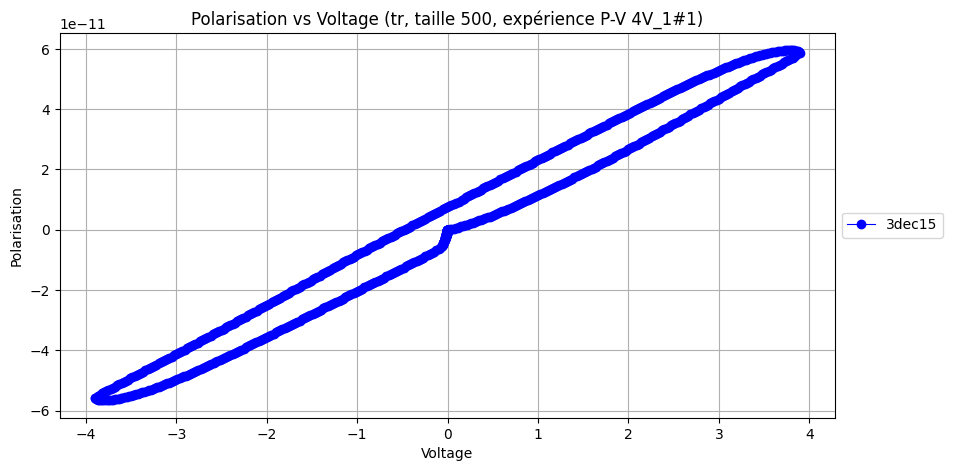

In [13]:
data_list = []
data_folder = "C:\Documents\EPFL\MA4\Projet_de_semestre\Code\Real_data"

# Demander à l'utilisateur le nombre de chips à charger
nombre_de_chips = int(input("Combien de chips voulez-vous charger ? "))

placement = input(f"Entrez le placement pour la chip (tr, tl, br, bl): ")
size = input(f"Entrez la taille pour la chip (50, 100, 150, 200, 500): ")
Size_num = int(size)
graph_type = input(f"Entrez le type de graphe pour la chip (P-V 1V_1#1, P-V 2V_1#1): ")

# Charger les données pour chaque chip
for i in range(1, nombre_de_chips + 1):
    chip_name = input(f"Entrez le nom de la chip {i}: ")
    
    data_variable_name = f"data_{chip_name}"
    data = load_data(data_folder, chip_name, placement, size, graph_type)
    if data is not None:
        data_list.append(data)
        # Stocker les données dans une variable avec un nom unique
        data['Chip'] = chip_name
        globals()[data_variable_name] = data
        print(f"Les données pour la chip {chip_name} ont été chargées avec succès dans la variable {data_variable_name}.")
    else:
        print(f"Aucun fichier correspondant pour la chip {chip_name}.")

if(graph_type == "PUND 5V_1#1"):    
    plot_pump(data_list)
else:
    plot_data(data_list)